In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine-clustering.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Checking if there is any null values

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Visualize each function as a boxplot to see if there are outliers

c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

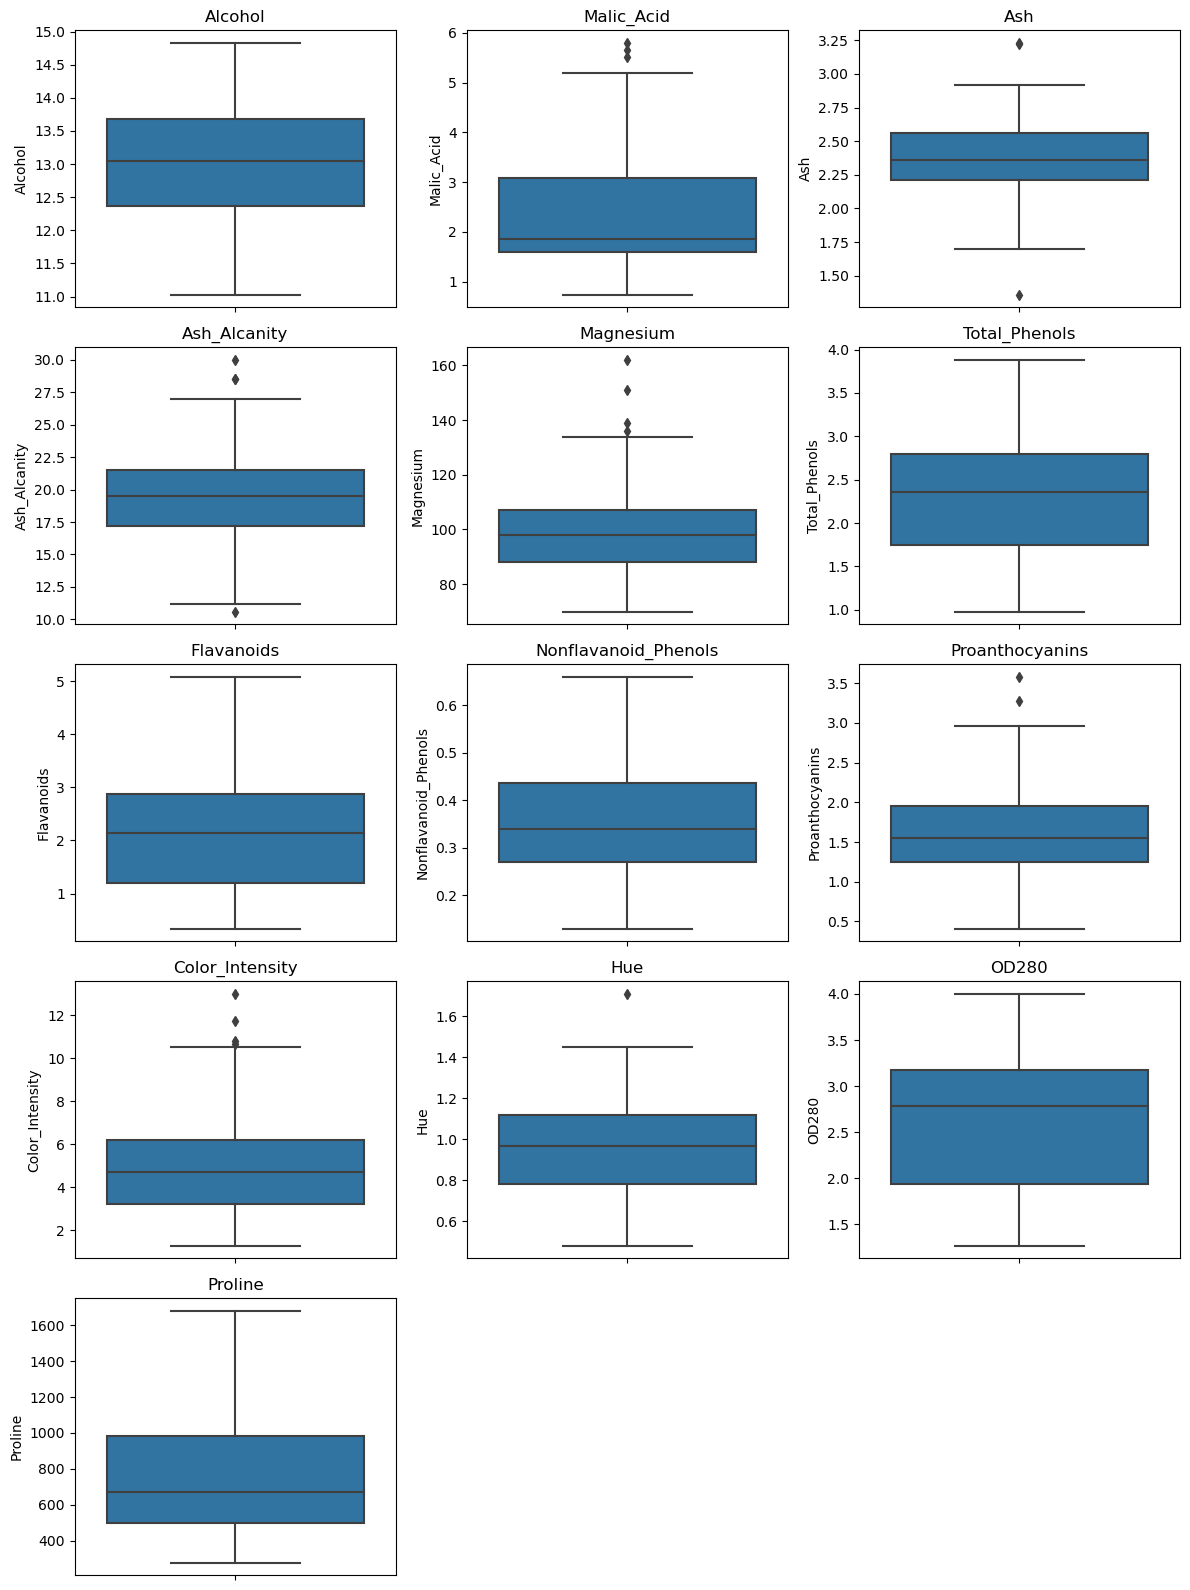

In [7]:
plt.figure(figsize=(12, 16))  

# Loop through each column and create a boxplot 
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(5, 3, df.columns.get_loc(column) + 1)
        sns.boxplot(y=df[column])
        plt.title(column)

plt.tight_layout()
plt.show()

#### Removing outliers for each feature

In [8]:
for column in range(len(df.columns)):
    q75, q25 = np.percentile(df[df.columns[column]], [75, 25])
    iqr = q75 - q25
    iqrMin = q25 - (iqr * 1.5)
    iqrMax = q75 + (iqr * 1.5)
    print(df.columns[column])
    print(f"iqrMin {iqrMin}")
    print(f"iqrMax {iqrMax}")
    print(f"count IqrMin: {len(df[df[df.columns[column]] < iqrMin])}")
    print(f"count IqrMax: {len(df[df[df.columns[column]] > iqrMax])}")
    df = df.drop(df[df[df.columns[column]] < iqrMin].index, axis=0)
    df = df.drop(df[df[df.columns[column]] > iqrMax].index, axis=0)

Alcohol
iqrMin 10.389999999999997
iqrMax 15.650000000000002
count IqrMin: 0
count IqrMax: 0
Malic_Acid
iqrMin -0.6174999999999997
iqrMax 5.3025
count IqrMin: 0
count IqrMax: 3
Ash
iqrMin 1.6925000000000003
iqrMax 3.0724999999999993
count IqrMin: 1
count IqrMax: 2
Ash_Alcanity
iqrMin 10.687500000000002
iqrMax 27.987499999999997
count IqrMin: 0
count IqrMax: 2
Magnesium
iqrMin 59.5
iqrMax 135.5
count IqrMin: 0
count IqrMax: 3
Total_Phenols
iqrMin 0.07500000000000018
iqrMax 4.435
count IqrMin: 0
count IqrMax: 0
Flavanoids
iqrMin -1.3099999999999996
iqrMax 5.409999999999999
count IqrMin: 0
count IqrMax: 0
Nonflavanoid_Phenols
iqrMin 0.017500000000000043
iqrMax 0.6775
count IqrMin: 0
count IqrMax: 0
Proanthocyanins
iqrMin 0.23750000000000027
iqrMax 2.9374999999999996
count IqrMin: 0
count IqrMax: 2
Color_Intensity
iqrMin -1.1999999999999997
iqrMax 10.719999999999999
count IqrMin: 0
count IqrMax: 3
Hue
iqrMin 0.3012499999999998
iqrMax 1.6112500000000003
count IqrMin: 0
count IqrMax: 1
OD280


Histplot visualization for each function after removing outliers

c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

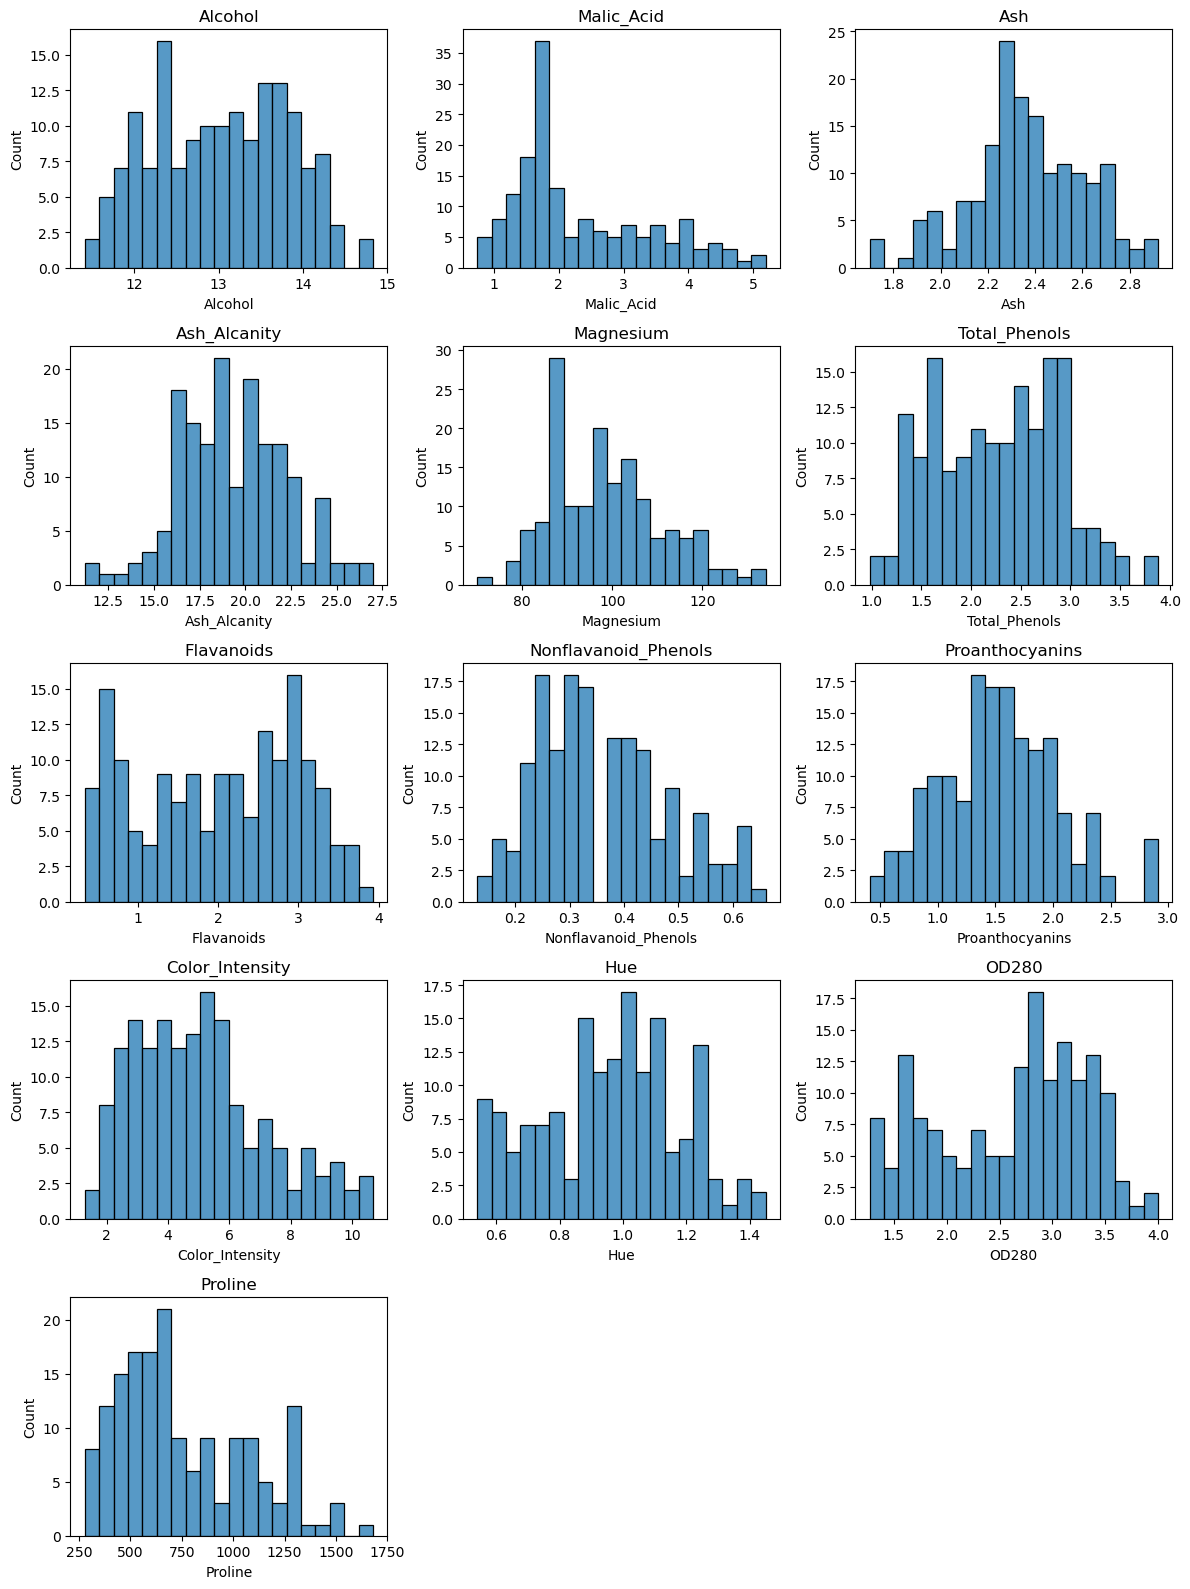

In [9]:
plt.figure(figsize=(12, 16))  

# Loop through each column and create a histplot 
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(5, 3, df.columns.get_loc(column) + 1)
        sns.histplot(x=df[column], bins=20)
        plt.title(column)

plt.tight_layout()
plt.show()

Checking correlation between features

<Figure size 1000x800 with 0 Axes>

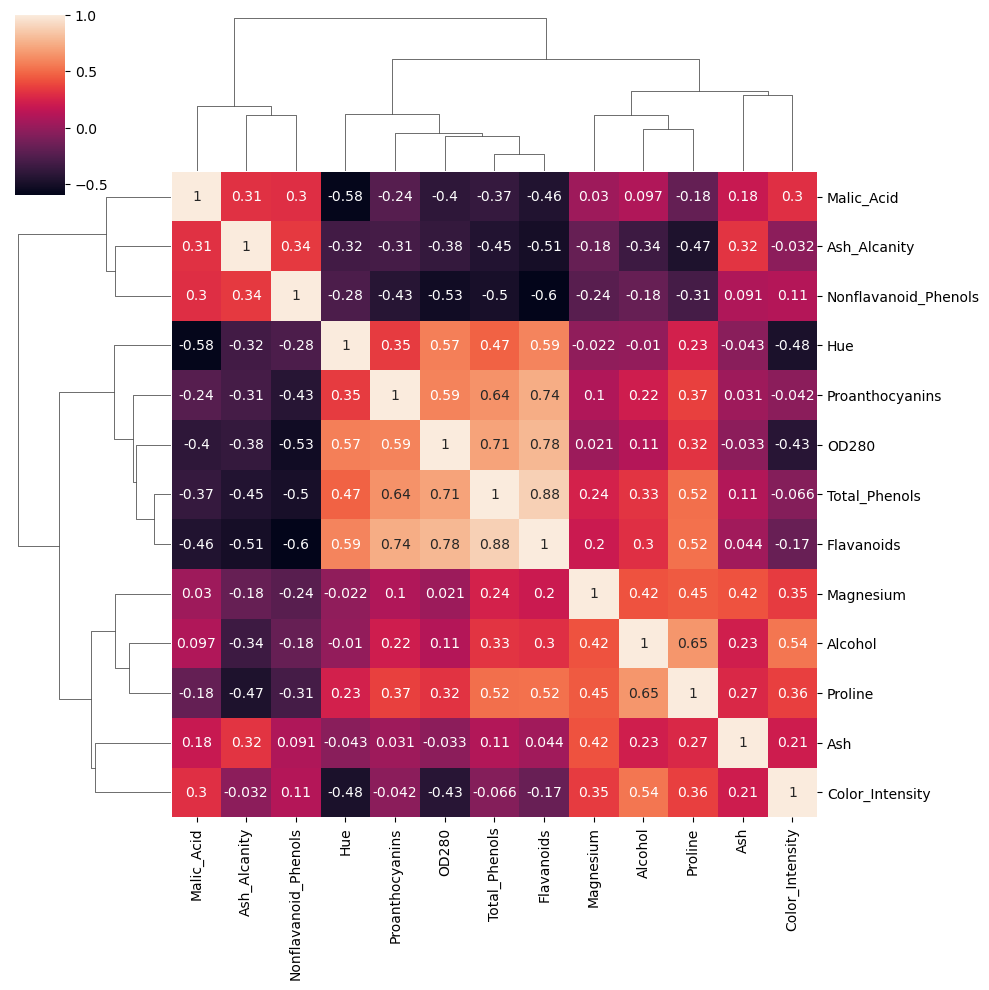

In [10]:
plt.figure(figsize=(10,8))
sns.clustermap(df.corr(), annot=True);

**It seems that 3 clusters are required to define the wine type**

**Let's check this on a 2d chart**

**To do this, we need to use PCA to reduce some dimensions**

## PCA

In [11]:
# !pip install sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

As always need to scale data first

In [12]:
scaler = StandardScaler()

In [13]:
scaled_df = scaler.fit_transform(df)

c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [14]:
scaled_df

array([[ 1.51516332, -0.57916566,  0.27093638, ...,  0.3833328 ,
         1.82809675,  0.98217445],
       [ 0.20964771, -0.51250719, -0.93153695, ...,  0.42947949,
         1.09692792,  0.93483012],
       [ 0.15894808,  0.03980581,  1.26608672, ...,  0.33718612,
         0.77352632,  1.36092915],
       ...,
       [ 0.29837208,  1.8681523 , -0.43396178, ..., -1.69326819,
        -1.49028487,  0.25622795],
       [ 0.17162299,  0.25882648,  0.02214879, ..., -1.6471215 ,
        -1.40591924,  0.27200939],
       [ 1.38841423,  1.69674482,  1.5563389 , ..., -1.60097481,
        -1.43404112, -0.61175157]])

Choosing 2 componets to make 2d df

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(scaled_df)

PCA(n_components=2)

Results for each Principal component

In [17]:
pc_results = pca.transform(scaled_df)
pd.DataFrame(pc_results, columns=["PC1", "PC2"])

,PC1,PC2
0,-3.503528,-1.609446
1,-2.342642,0.331164
2,-2.661349,-0.936183
3,-3.925301,-2.710827
4,-1.032831,-1.074396
...,...,...
156,2.405826,-2.242187
157,2.642860,-1.932660
158,2.656031,-3.179693
159,2.354087,-2.646939


In [18]:
pd.DataFrame(pca.explained_variance_ratio_, columns=["Variance"], index=["PC1", "PC2"])

,Variance
PC1,0.385524
PC2,0.206595


Making 2d plot from our pc1 and pc2

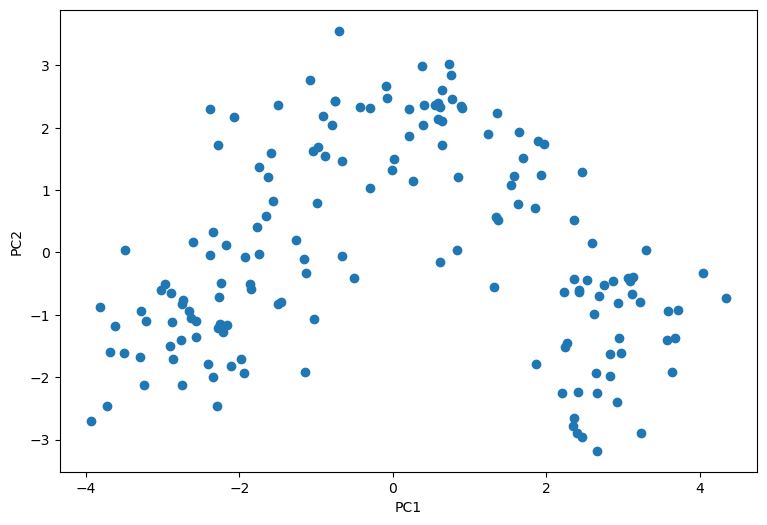

In [19]:
plt.figure(figsize=(9,6))
plt.scatter(pc_results[:,0], pc_results[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2");

**From now we can se we have 3 classes so lets assign them using Hierarchical Clustering and K-Means**

## Hierarchical Clustering (AgglomerativeClustering)

For Hierarchical Clustering we need to scale data from 0-1

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
minmax_df = scaler.fit_transform(df)
minmax_df

c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

array([[0.8245614 , 0.21797753, 0.59836066, ..., 0.54945055, 0.97069597,
        0.56134094],
       [0.52339181, 0.23370787, 0.36065574, ..., 0.56043956, 0.78021978,
        0.55064194],
       [0.51169591, 0.36404494, 0.79508197, ..., 0.53846154, 0.6959707 ,
        0.64693295],
       ...,
       [0.54385965, 0.79550562, 0.45901639, ..., 0.05494505, 0.10622711,
        0.39728959],
       [0.51461988, 0.41573034, 0.54918033, ..., 0.06593407, 0.12820513,
        0.40085592],
       [0.79532164, 0.75505618, 0.85245902, ..., 0.07692308, 0.12087912,
        0.20114123]])

Relations beetween featrues

<Figure size 800x600 with 0 Axes>

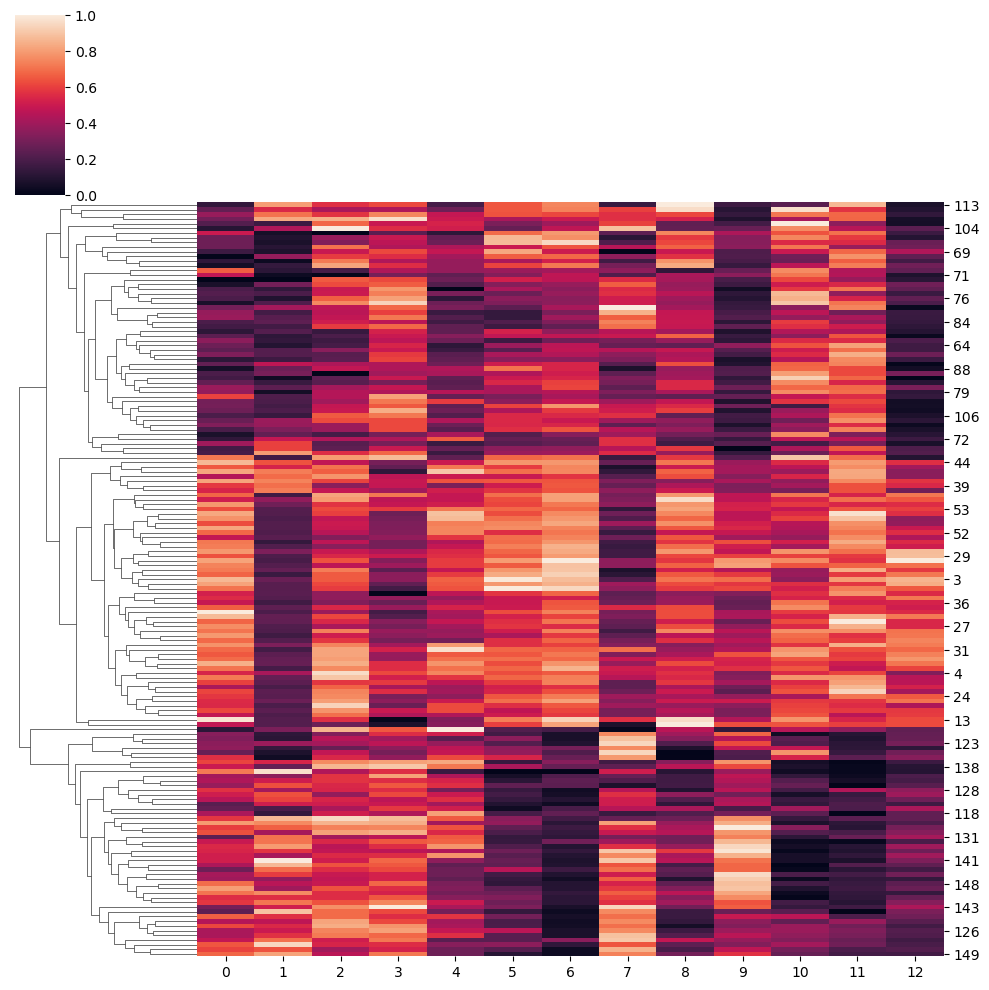

In [23]:
plt.figure(figsize=(8,6))
sns.clustermap(minmax_df, col_cluster=False);

Creating model using 3 clusters

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
model_agg = AgglomerativeClustering(n_clusters=3)

In [26]:
clusters_labels_agg= model_agg.fit_predict(minmax_df)
clusters_labels_agg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

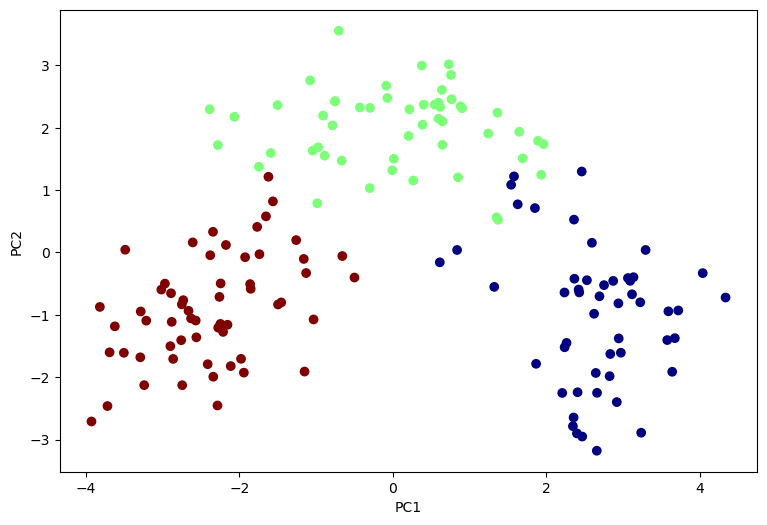

In [27]:
plt.figure(figsize=(9,6))
plt.scatter(pc_results[:,0], pc_results[:,1], c=clusters_labels_agg, cmap="jet")
plt.xlabel("PC1")
plt.ylabel("PC2");

## K-Means

In [28]:
from sklearn.cluster import KMeans

In [29]:
model_km = KMeans(n_clusters=3, n_init=9)

In [30]:
cluster_labels_km = model_km.fit_predict(scaled_df)

c:\Users\hosse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Defining centroids

In [31]:
centroids = model_km.cluster_centers_
centroids

array([[ 0.90143089, -0.29114763,  0.32694995, -0.7806866 ,  0.60788958,
         0.88572266,  0.97023401, -0.59422851,  0.66686153,  0.229919  ,
         0.46833986,  0.7592187 ,  1.13417469],
       [-0.96015895, -0.45028168, -0.43682141,  0.29927164, -0.60697184,
        -0.06283865,  0.04141528,  0.00250436,  0.04315225, -0.94144898,
         0.47928609,  0.28721177, -0.781647  ],
       [ 0.09364475,  0.92851635,  0.14564118,  0.59003002,  0.01205784,
        -1.01829457, -1.25446575,  0.73316896, -0.88073777,  0.90214474,
        -1.18465143, -1.30290758, -0.41983547]])

In [32]:
centroids_pca = pca.transform(centroids)

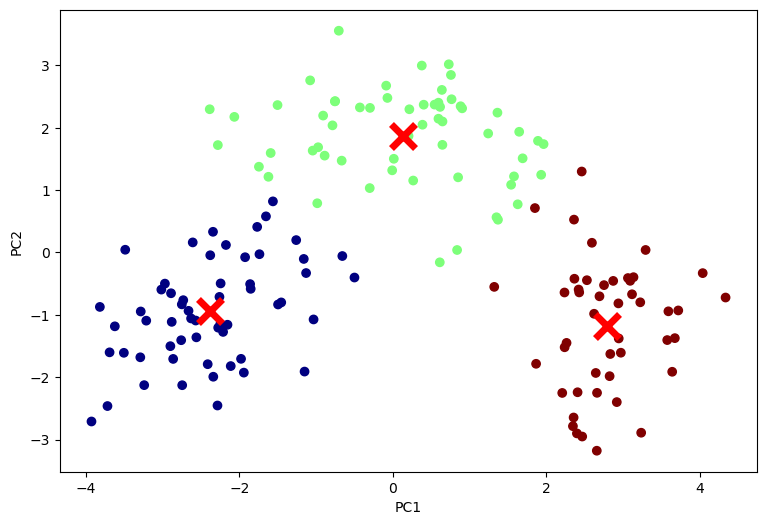

In [33]:
plt.figure(figsize=(9,6))
plt.scatter(pc_results[:,0], pc_results[:,1], c=cluster_labels_km, cmap="jet")
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=300, linewidths=5, color="red")
plt.xlabel("PC1")
plt.ylabel("PC2");

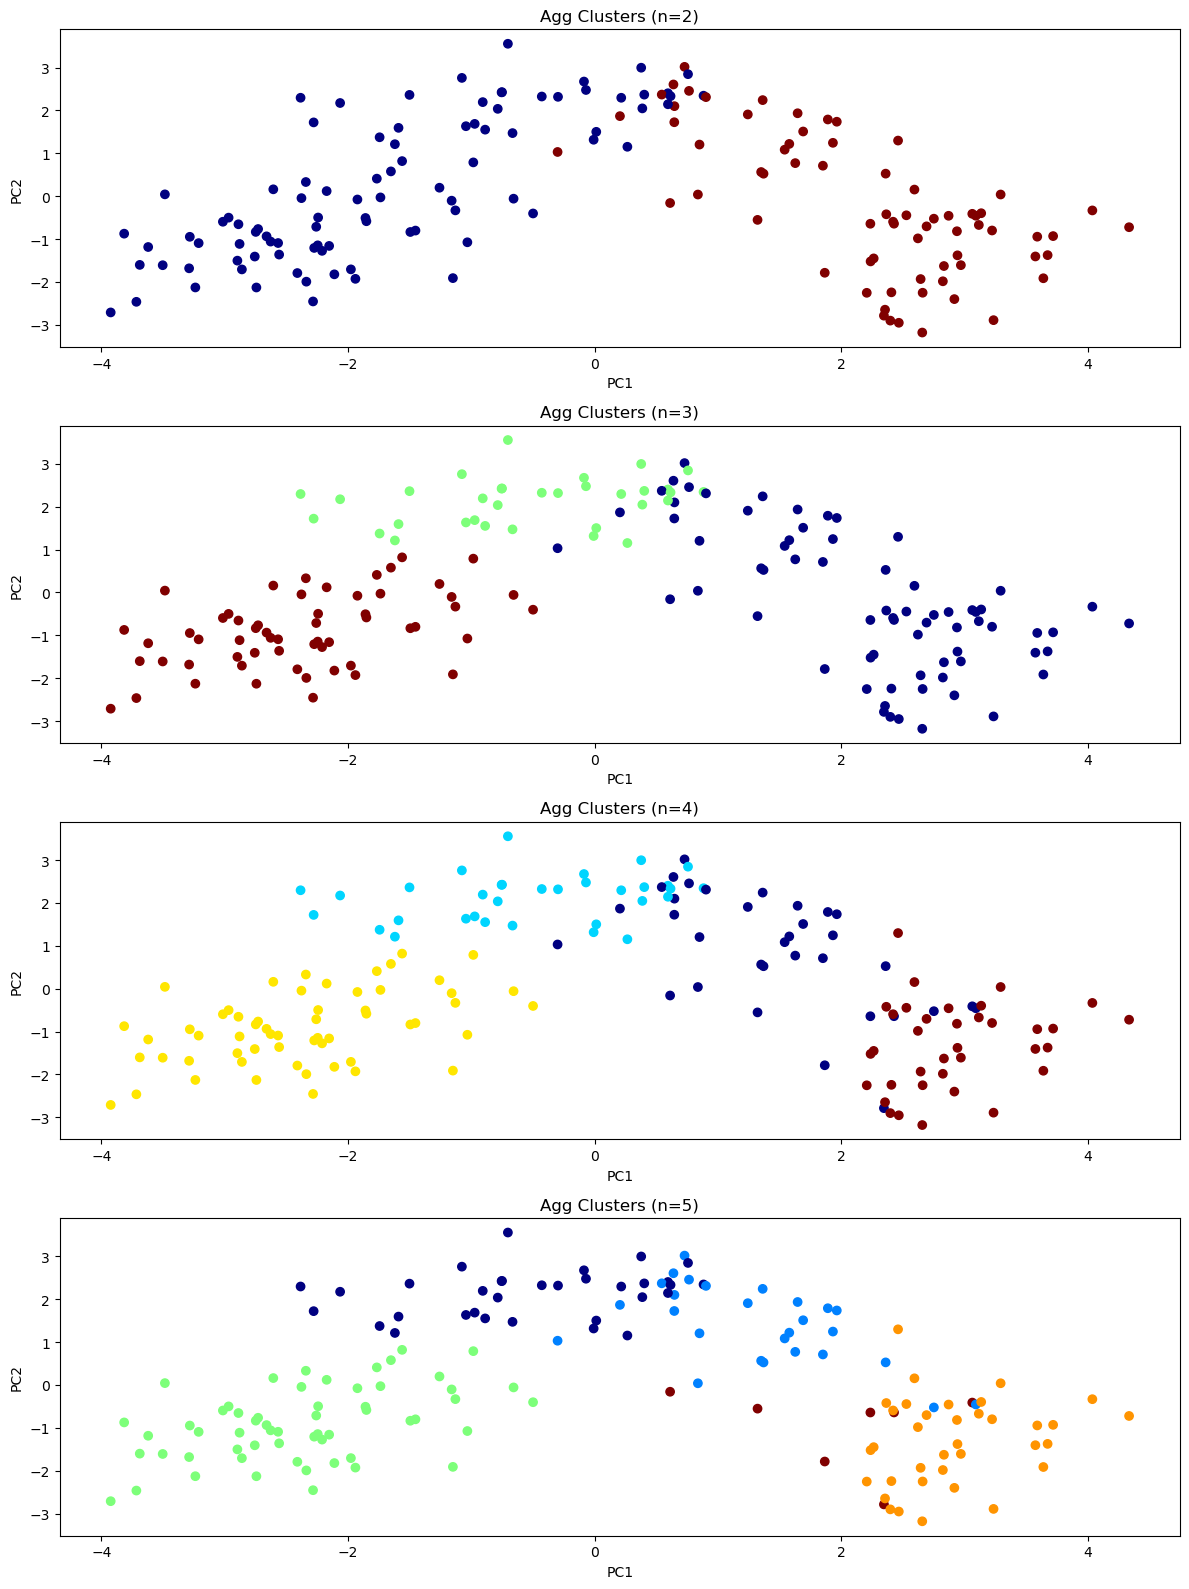

In [61]:
# Create a copy of your DataFrame for this variation
df_agg = df.copy()

# Perform Agglomerative Clustering with different hyperparameters
# You can experiment with different linkage methods and number of clusters
n_clusters = [2, 3, 4, 5]  # Try different numbers of clusters

plt.figure(figsize=(12, 4 * len(n_clusters)))

for i, n in enumerate(n_clusters):
    # Initialize AgglomerativeClustering with different hyperparameters
    model_agg = AgglomerativeClustering(n_clusters=n, linkage='complete')  # Experiment with linkage

    # Fit the model and get cluster labels
    cluster_labels_agg = model_agg.fit_predict(scaled_df)

    # Add the cluster labels to the DataFrame
    df_agg[f'Agg_Labels_{n}'] = cluster_labels_agg

    # Visualize the clusters on the 2D PCA plot
    plt.subplot(len(n_clusters), 1, i + 1)
    plt.scatter(pc_results[:, 0], pc_results[:, 1], c=cluster_labels_agg, cmap="jet")
    plt.title(f'Agg Clusters (n={n})')
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()
